In [1]:
# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

# I. Data Exploration <font color= black>
    

In [4]:
# Read training data
training_df = pd.read_csv('~/train.csv', error_bad_lines=False)

In [6]:
training_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
training_df.shape

(404290, 6)

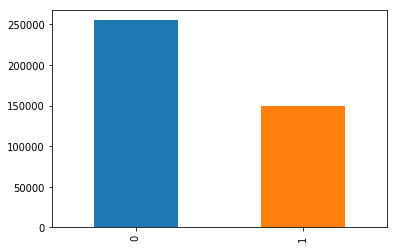

In [15]:
#unique values 
pd.value_counts(training_df['is_duplicate']).plot.bar()

In [16]:
#Test data information

test_df = pd.read_csv('~/test.csv')
print("Number of testing data: %d" %len(test_df))
test_df.head(5)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



Number of testing data: 3563475


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [5]:
test_df.shape

(3563475, 3)

In [17]:
# data frame with dependant variable

y =training_df['is_duplicate']

In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [19]:
# data frame with independant variable
training_df =training_df.drop(columns=['is_duplicate'])

# II. Data processing <font color= black>

In [ ]:
# Corpus creation on the data given in the trainging and test sets

In [6]:
question_corpus = pd.concat([training_df[['question1','question2']], test_df[['question1','question2']]])

In [ ]:
# Corpus content filteration

In [20]:
# Downloading the necessary libraries

from nltk.corpus import stopwords
from nltk.stem.porter import *
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
sw_dict={}
    
for i in stopwords.words('english'):
    sw_dict[i]=1
    



In [21]:
import re
from nltk.stem import WordNetLemmatizer

from stemming.porter2 import stem

lemi_words=[]
stem_words=[]
lmtzr = nltk.WordNetLemmatizer().lemmatize
ps = PorterStemmer()



def do_lemitise(word):
    old_word=word
    word = lmtzr(word)
    if word != old_word:
        lemi_words.append((old_word, word))
        
    return word
    
def do_stem(word):
    old_word=word
    word = stem(word)
    if word != old_word:
        stem_words.append((old_word, word))
    return word
        

def do_process_word(word):
    word = do_stem(word)
    word = do_lemitise(word)
    return word
    
    
    

def corpus_filteration(dfList):
    
    actual_list =[]
    

    
    item_num=0

    for k, v in dfList.iteritems():
        questions_corpus = re.sub('[^a-zA-Z]',' ', str(v)).lower().split()
        questions_corpus = [do_process_word(word) for word in questions_corpus if word not in sw_dict.keys()]
        
        actual_list.append(questions_corpus)
        item_num = item_num + 1
        if (item_num%1000000 == 0):
            print ("Done so far {} ".format(item_num) )
    
    return actual_list           
    
    

In [24]:
training_df_question1 = corpus_filteration(training_df['question1'])

In [25]:
training_df_question2 = corpus_filteration(training_df['question2'])

In [ ]:
question_corpus_list= corpus_filteration(question_corpus['question1']) + corpus_filteration(question_corpus['question2'])

In [ ]:
new_file=open("question_corpus_list.txt",mode="a")


for i in test_question_list:
    new_file.writelines(i)
new_file.close()

In [41]:

from gensim.models import Word2Vec
model = Word2Vec(test_question_list, min_count=1,size=50)



words = list(model.wv.vocab)

model.save('model.bin')


"\nfrom gensim.models import Word2Vec\nmodel = Word2Vec(test_question_list, min_count=1,size=50)\n\n\n\nwords = list(model.wv.vocab)\n\nmodel.save('model.bin')\n"

In [27]:
# word2vec embeddings 

In [26]:

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

word2vec_model = KeyedVectors.load('model.bin')
word2vec_model.init_sims(replace=True)


In [28]:
print(type(word2vec_model))


<class 'gensim.models.word2vec.Word2Vec'>


In [ ]:
#Distance calculation between the vectors

In [30]:
from pyemd import emd
def distance_calculation(d1,d2):
        i=j=0
        distance_list=[]
        len_train_01 =len(d1)
        len_train_02 =len(d2)
        item_num=0
        
        
        while (i<len_train_01 and j<len_train_02):
            distance_questions = word2vec_model.wv.wmdistance(d1[i], d2[j])
            
            distance_list.append(distance_questions)
            i=i+1
            j=j+1
            item_num = item_num + 1
            if (item_num%100000 == 0):
                print ("Done so far {} ".format(item_num) )
        training_df['is_duplicate_01']=distance_list
        return training_df['is_duplicate_01']
        

In [31]:
distance_calculation(training_df_question1,training_df_question2)

Done so far 100000 
Done so far 200000 
Done so far 300000 
Done so far 400000 


0         0.182588
1         0.794831
2         0.522713
3         1.230278
4         0.934650
5         0.602225
6         1.343568
7         0.457476
8         0.000000
9         0.643127
10        1.200547
11        0.563762
12        0.000000
13        0.305871
14        0.085295
15        0.769805
16        0.000000
17        0.408174
18        0.575044
19        0.120852
20        0.663469
21        0.300835
22        0.000000
23        1.317550
24        0.769116
25        0.199825
26        0.318798
27        0.769089
28        0.250733
29        0.653618
            ...   
404260    0.574573
404261    0.297097
404262    0.285560
404263    0.558133
404264    0.819386
404265    0.381791
404266    0.938127
404267    0.427773
404268    0.924855
404269    0.490077
404270    0.000000
404271    0.811712
404272    0.709233
404273    0.508930
404274    0.493883
404275    0.694403
404276    0.147626
404277    1.004356
404278    0.506764
404279    0.846021
404280    0.205289
404281    0.

In [32]:
# Assigning the values as 0 and 1
item_num =0
for i, row in training_df['is_duplicate_01'].iteritems():
    if row == 0.000000:
        training_df.set_value(i,'is_duplicate_01',int(1))
    elif (row >= 0.28 and row <= 0.72):
        training_df.set_value(i,'is_duplicate_01',int(1))
    else:
        training_df.set_value(i,'is_duplicate_01',int(0))
    item_num = item_num + 1
    if (item_num%100000 == 0):
        print ("Done so far {} ".format(item_num) )
        
   


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



Done so far 100000 
Done so far 200000 
Done so far 300000 
Done so far 400000 


In [33]:
# calculate the average length of the questions

def avg_length_corpus(training_error1_cf):
    
    min_length=0
    max_length=len(training_error1_cf[0])
    
    for i in range(0,len(training_error1_cf)):
        if len(training_error1_cf[i]) <=min_length :
            min_length= len(training_error1_cf[i])
        
    
    for i in range(1,len(training_error1_cf)):
        if len(training_error1_cf[i]) > max_length:
            max_length= len(training_error1_cf[i])
        
    
    avg_length= (min_length + max_length)//2
    
    
    return min_length,max_length,avg_length



In [35]:
avg_question1_training_set= avg_length_corpus(training_df_question1)

In [36]:
avg_question2_training_set= avg_length_corpus(training_df_question1)

In [37]:
def len_trainging_questions_array(training_error1_cf):
    questions_length_array =[]
    for i in training_error1_cf:
        questions_length_array.append(len(i))
        
    return questions_length_array
    

In [38]:
question_1_length =len_trainging_questions_array(training_df_question1)

In [39]:
question_2_length =len_trainging_questions_array(training_df_question1)

# III. Feature  Visualization <font color= black>

In [47]:

import plotly.plotly as py
import plotly.graph_objs as go


trace = go.Box(
    y= question_2_length,
    name='Mean & SD',
    marker=dict(
        color='rgb(10, 140, 208)',
    ),
    boxmean='sd'
)
data = [trace]
#py.iplot(data)
plotly.offline.plot(data)


'file:///home/ubuntu/temp-plot.html'

In [41]:
def duplicate_entries(input_array):
    
    final_result=[]
    new_array=[]
    unseen=set()
    count=0
    for i in input_array:
        for j in i:
                 if j not in unseen:
                    unseen.add(j)
                    final_result.append(word2vec_model[j])
                    #final_result.append(j)
        if len(final_result) >6:
            final_result=final_result[0:6]
        else:
            array_length=len(final_result)
            while array_length <6:
                final_result.append(np.zeros(50))
                array_length=array_length +1
                    
        new_array.append(final_result)
        final_result=[]
            
    
    return new_array






In [43]:
vector_training_set_question1 =duplicate_entries(training_df_question1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [45]:
vector_training_set_question2 =duplicate_entries(training_df_question1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [49]:
question1_vector = np.array(vector_training_set_question1)
question2_vector = np.array(vector_training_set_question2)

In [50]:
result=np.column_stack((question1_vector,question2_vector))

In [51]:
len(result)


404290

In [52]:
#creating the input dimensions
in_dim=600

In [53]:
X=result

In [54]:
# Split training data to train and validation data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=30)

In [55]:
X_train= X_train.reshape(363861, in_dim)

In [56]:
X_train = X_train.astype('float32')

In [57]:
X_test = X_test.reshape(40429, in_dim) 

In [58]:
X_test = X_test.astype('float32')


# IV. Algorithms and Techniques <font color= black>

In [59]:
# Importing necessary libraries for KNN

from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.regularizers import L1L2
from keras.utils import np_utils
from keras.layers import LSTM,Flatten

Using TensorFlow backend.


In [60]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [61]:
# reshaping the input making it one dimensional
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [62]:
#Making the sequential model in keras

model = Sequential()

model.add(LSTM(30, dropout_U =0.2,input_shape=(1, 600),return_sequences=True))
model.add(Flatten())
model.add(Dense(2, activation='softmax',input_dim=600) )

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(30, input_shape=(1, 600), return_sequences=True, recurrent_dropout=0.2)`



In [63]:
# Compiling the model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
history = model.fit(X_train, Y_train, validation_split=0.10,epochs=100,batch_size=8)

Train on 327474 samples, validate on 36387 samples
Epoch 1/100
327474/327474 [==============================] - 102s 311us/step - loss: 0.6540 - acc: 0.6310 - val_loss: 0.6519 - val_acc: 0.6276
Epoch 2/100
327474/327474 [==============================] - 101s 308us/step - loss: 0.6502 - acc: 0.6300 - val_loss: 0.6504 - val_acc: 0.6271
Epoch 3/100
327474/327474 [==============================] - 101s 308us/step - loss: 0.6498 - acc: 0.6299 - val_loss: 0.6502 - val_acc: 0.6273
Epoch 4/100
327474/327474 [==============================] - 101s 307us/step - loss: 0.6496 - acc: 0.6299 - val_loss: 0.6498 - val_acc: 0.6273
Epoch 5/100
327474/327474 [==============================] - 99s 302us/step - loss: 0.6494 - acc: 0.6300 - val_loss: 0.6498 - val_acc: 0.6273
Epoch 6/100
327474/327474 [==============================] - 99s 302us/step - loss: 0.6493 - acc: 0.6301 - val_loss: 0.6496 - val_acc: 0.6274
Epoch 7/100
327474/327474 [==============================] - 99s 302us/step - loss: 0.6493 - 

Epoch 58/100
327474/327474 [==============================] - 98s 300us/step - loss: 0.6471 - acc: 0.6313 - val_loss: 0.6478 - val_acc: 0.6284
Epoch 59/100
327474/327474 [==============================] - 98s 299us/step - loss: 0.6471 - acc: 0.6313 - val_loss: 0.6483 - val_acc: 0.6284
Epoch 60/100
327474/327474 [==============================] - 98s 299us/step - loss: 0.6470 - acc: 0.6313 - val_loss: 0.6488 - val_acc: 0.6284
Epoch 61/100
327474/327474 [==============================] - 98s 300us/step - loss: 0.6471 - acc: 0.6313 - val_loss: 0.6479 - val_acc: 0.6284
Epoch 62/100
327474/327474 [==============================] - 98s 300us/step - loss: 0.6470 - acc: 0.6314 - val_loss: 0.6477 - val_acc: 0.6284
Epoch 63/100
327474/327474 [==============================] - 98s 300us/step - loss: 0.6470 - acc: 0.6314 - val_loss: 0.6484 - val_acc: 0.6283
Epoch 64/100
327474/327474 [==============================] - 98s 299us/step - loss: 0.6470 - acc: 0.6314 - val_loss: 0.6476 - val_acc: 0.6284

In [65]:
score = model.evaluate(X_test, Y_test,verbose=0)



In [66]:
# Score after the RNN LSTM model used 

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6490898806081241
Test accuracy: 0.6280392787444069


In [67]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


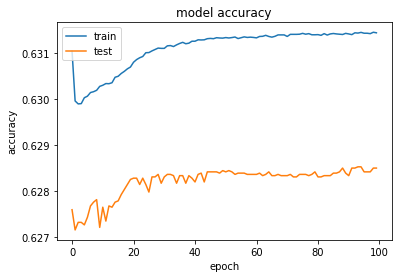

In [68]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

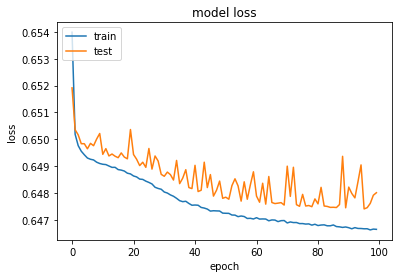

In [69]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
predictions = model.predict(X_test)
print('First prediction:', predictions)

First prediction: [[0.6258089  0.37419108]
 [0.6258089  0.37419108]
 [0.6258089  0.37419108]
 ...
 [0.6258089  0.37419108]
 [0.6258089  0.37419108]
 [0.6258089  0.37419105]]


In [ ]:
# KNN model

In [25]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [26]:
nsamples1, nx1, ny1 = X_test.shape
X_test = X_test.reshape((nsamples1,nx1*ny1))


In [27]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[25257   136]
 [14970    66]]
             precision    recall  f1-score   support

          0       0.63      0.99      0.77     25393
          1       0.33      0.00      0.01     15036

avg / total       0.52      0.63      0.49     40429



In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6263573177669495


In [ ]:
#Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model= RandomForestRegressor(n_estimators=1000)
# Train the model using the training sets and check score
model.fit(X,y)
#Predict Output

In [ ]:
predicted= model.predict(Y_test)